In [1]:
import pandas as pd  
import matplotlib.pylab as plt  
%matplotlib inline  
import numpy as np  
from scipy.stats import linregress  
import scipy.stats as stats  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix  
from matplotlib.colors import ListedColormap  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  


In [2]:
# Read CSV files from Wendy directories
calendar = pd.read_csv(r"D:\\year3\\FIT3163\\Project\\calendar.csv")
evaluation = pd.read_csv(r"D:\\year3\\FIT3163\\Project\\sales_train_evaluation.csv")
validation = pd.read_csv(r"D:\\year3\\FIT3163\\Project\\sales_train_validation.csv")
prices = pd.read_csv(r"D:\\year3\\FIT3163\\Project\\sell_prices.csv")
sample = pd.read_csv(r"D:\\year3\\FIT3163\\Project\\sample_submission.csv")

In [2]:
# Read CSV files from Janice's directory
calendar = pd.read_csv(r"D:\\YEAR 3\\Semester 1\\FIT3163\\calendar.csv")
evaluation = pd.read_csv(r"D:\\YEAR 3\\Semester 1\\FIT3163\\sales_train_evaluation.csv")
validation = pd.read_csv(r"D:\\YEAR 3\\Semester 1\\FIT3163\\sales_train_validation.csv")
prices = pd.read_csv(r"D:\\YEAR 3\\Semester 1\\FIT3163\\sell_prices.csv")
sample = pd.read_csv(r"D:\\YEAR 3\\Semester 1\\FIT3163\\sample_submission.csv")



In [3]:
# Display information about the sample DataFrame
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

In [4]:
include = ['object', 'float', 'int']
sample.describe(include=include)

,id
count,60980
unique,60980
top,HOBBIES_1_218_TX_3_validation
freq,1


In [5]:
sample.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,...,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
sample.isnull().any()

id     False
F1     False
F2     False
F3     False
F4     False
F5     False
F6     False
F7     False
F8     False
F9     False
F10    False
F11    False
F12    False
F13    False
F14    False
F15    False
F16    False
F17    False
F18    False
F19    False
F20    False
F21    False
F22    False
F23    False
F24    False
F25    False
F26    False
F27    False
F28    False
dtype: bool

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [8]:
include = ['object', 'float', 'int']
calendar.describe(include=include)

,date,weekday,d,event_name_1,event_type_1,event_name_2,event_type_2
count,1969,1969,1969,162,162,5,5
unique,1969,7,1969,30,4,4,2
top,2015-04-15,Sunday,d_540,NBAFinalsStart,Religious,Father's day,Cultural
freq,1,282,1,6,55,2,4


In [9]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [10]:
calendar.isnull().any()

date            False
wm_yr_wk        False
weekday         False
wday            False
month           False
year            False
d               False
event_name_1     True
event_type_1     True
event_name_2     True
event_type_2     True
snap_CA         False
snap_TX         False
snap_WI         False
dtype: bool

In [11]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [12]:
include = ['object', 'float', 'int']
evaluation.describe(include=include)

,id,item_id,dept_id,cat_id,store_id,state_id
count,30490,30490,30490,30490,30490,30490
unique,30490,3049,7,3,10,3
top,FOODS_3_008_CA_3_evaluation,FOODS_3_025,FOODS_3,FOODS,WI_1,CA
freq,1,10,8230,14370,3049,12196


In [13]:
evaluation.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1937      False
d_1938      False
d_1939      False
d_1940      False
d_1941      False
Length: 1947, dtype: bool

In [14]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [15]:
include = ['object', 'float', 'int']
validation.describe(include=include)

,id,item_id,dept_id,cat_id,store_id,state_id
count,30490,30490,30490,30490,30490,30490
unique,30490,3049,7,3,10,3
top,HOUSEHOLD_1_474_WI_3_validation,FOODS_3_025,FOODS_3,FOODS,WI_1,CA
freq,1,10,8230,14370,3049,12196


In [16]:
validation.isnull().any()

id          False
item_id     False
dept_id     False
cat_id      False
store_id    False
            ...  
d_1909      False
d_1910      False
d_1911      False
d_1912      False
d_1913      False
Length: 1919, dtype: bool

In [17]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [18]:
include = ['object', 'float', 'int']
prices.describe(include=include)

,store_id,item_id,sell_price
count,6841121,6841121,6.841121e+06
unique,10,3049,NaN
top,TX_2,HOUSEHOLD_1_397,NaN
freq,701214,2820,NaN
mean,NaN,NaN,4.410952e+00
std,NaN,NaN,3.408814e+00
min,NaN,NaN,1.000000e-02
25%,NaN,NaN,2.180000e+00
50%,NaN,NaN,3.470000e+00
75%,NaN,NaN,5.840000e+00


In [19]:
prices.isnull().any()

store_id      False
item_id       False
wm_yr_wk      False
sell_price    False
dtype: bool

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [111]:
sales_cols = ['item_id', 'dept_id','cat_id','store_id','state_id'] + [f'd_{i}' for i in range(1, 1942)]

In [112]:
merged_data = pd.concat([evaluation[sales_cols], calendar], axis=1)

In [113]:
merged_data = pd.merge(merged_data, prices, how='left', on=['item_id','store_id','wm_yr_wk'])

In [117]:
merged_data

,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2011.0,d_1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2011.0,d_2,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2011.0,d_3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2011.0,d_4,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2011.0,d_5,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
category_prices = merged_data.groupby("cat_id")["sell_price"].mean()

In [207]:
category_prices

cat_id
FOODS        3.699048
HOBBIES      4.472718
HOUSEHOLD    5.401569
Name: sell_price, dtype: float64

In [120]:
sales_by_category = merged_data.groupby('cat_id').sum()[['d_' + str(i) for i in range(1, 1942)]]

In [121]:
sales_by_category

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
cat_id,,,,,,,,,,,,,,,,,,,,,
FOODS,23178,22758,17174,18878,14603,22093,20490,27751,24862,18901,...,30107,36576,41447,29158,26148,24790,24737,28136,33599,35967
HOBBIES,3764,3357,2682,2669,1814,3220,2944,3986,2899,2615,...,3871,4893,5016,3528,3629,3740,3475,4143,5333,5280
HOUSEHOLD,5689,5634,3927,3865,2729,3898,4576,6195,4975,4056,...,10095,12839,13458,9676,9000,8566,8751,10273,12586,13091


In [122]:
sales_by_category['total_sales'] = sales_by_category.sum(axis=1)

In [123]:
sales_by_category['total_sales']

cat_id
FOODS        45922427
HOBBIES       6240656
HOUSEHOLD    14764090
Name: total_sales, dtype: int64

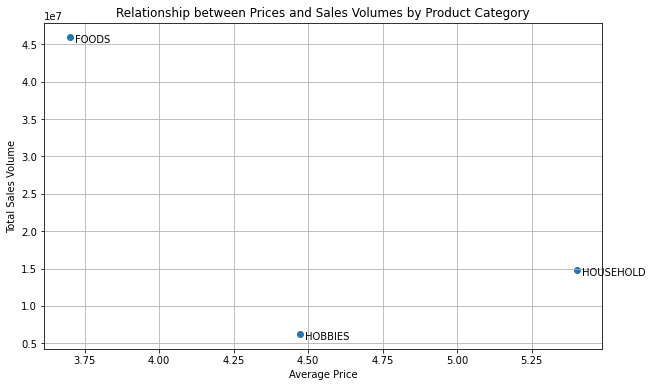

In [124]:
plt.figure(figsize=(10, 6))

# Plotting relationship between average prices and total sales volume for each category
plt.scatter(category_prices, sales_by_category['total_sales'])
plt.title('Relationship between Prices and Sales Volumes by Product Category')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

for i, txt in enumerate(category_prices.index):
    plt.annotate(txt, (category_prices[i], sales_by_category['total_sales'][i]), xytext=(5, -5), textcoords='offset points')

plt.show()

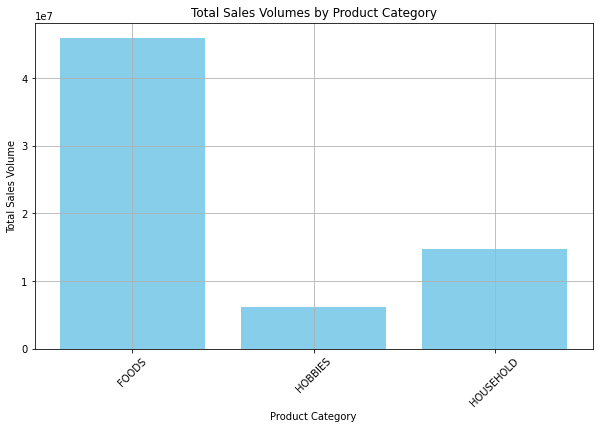

In [137]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(category_prices.index, sales_by_category['total_sales'], color='skyblue')
plt.title('Total Sales Volumes by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)


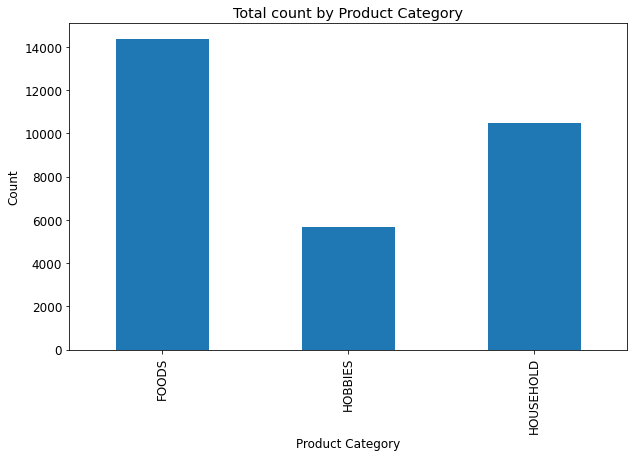

In [217]:
evaluation.groupby('cat_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

In [181]:
evaluation_data=evaluation[evaluation.columns[6:]].transpose()
training_dates=pd.to_datetime(calendar['date'])[:evaluation_data.shape[0]]
evaluation_data.index=training_dates
training_dates

0      2011-01-29
1      2011-01-30
2      2011-01-31
3      2011-02-01
4      2011-02-02
          ...    
1936   2016-05-18
1937   2016-05-19
1938   2016-05-20
1939   2016-05-21
1940   2016-05-22
Name: date, Length: 1941, dtype: datetime64[ns]

In [182]:
cat_sales=evaluation.groupby('cat_id').sum().transpose()
cat_sales.index=training_dates
cat_sales

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729
...,...,...,...
2016-05-18,24790,3740,8566
2016-05-19,24737,3475,8751
2016-05-20,28136,4143,10273


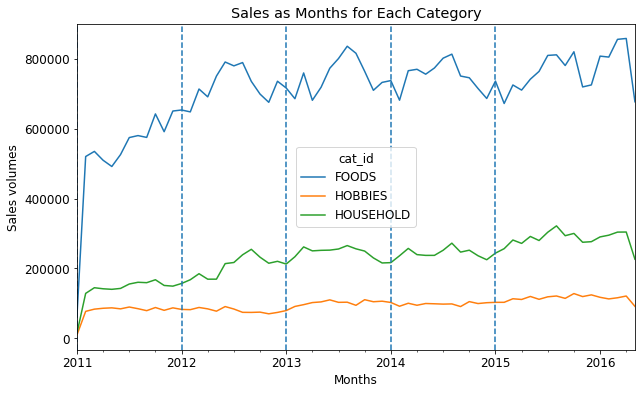

In [184]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
cat_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Category')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

In [126]:
dept_prices = merged_data.groupby("dept_id")["sell_price"].mean()
dept_prices

dept_id
FOODS_1        3.318333
FOODS_2        4.282270
FOODS_3             NaN
HOBBIES_1      5.238373
HOBBIES_2      2.674719
HOUSEHOLD_1    4.951305
HOUSEHOLD_2    5.767916
Name: sell_price, dtype: float64

In [127]:
sales_by_dept = merged_data.groupby('dept_id').sum()[['d_' + str(i) for i in range(1, 1942)]]
sales_by_dept

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
dept_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1,2343,2216,1657,1508,1209,1897,1903,2235,1925,1586,...,4130,4257,4225,3264,3119,3073,3251,3735,4195,4031
FOODS_2,4094,4209,3174,3606,2869,4375,3349,4384,4273,3684,...,5842,7563,9069,6226,5311,4648,4551,4815,5940,6535
FOODS_3,16741,16333,12343,13764,10525,15821,15238,21132,18664,13631,...,20135,24756,28153,19668,17718,17069,16935,19586,23464,25401
HOBBIES_1,3610,3172,2497,2531,1714,3133,2855,3831,2741,2514,...,3422,4414,4464,3109,3142,3291,3027,3761,4832,4720
HOBBIES_2,154,185,185,138,100,87,89,155,158,101,...,449,479,552,419,487,449,448,382,501,560
HOUSEHOLD_1,4105,3858,2827,2732,1802,2664,3161,4334,3494,2857,...,7936,10042,10572,7609,6999,6641,6759,7974,9668,10165
HOUSEHOLD_2,1584,1776,1100,1133,927,1234,1415,1861,1481,1199,...,2159,2797,2886,2067,2001,1925,1992,2299,2918,2926


In [128]:
sales_by_dept['total_sales'] = sales_by_dept.sum(axis=1)
sales_by_dept['total_sales']

dept_id
FOODS_1         5190400
FOODS_2         7795025
FOODS_3        32937002
HOBBIES_1       5699014
HOBBIES_2        541642
HOUSEHOLD_1    11722853
HOUSEHOLD_2     3041237
Name: total_sales, dtype: int64

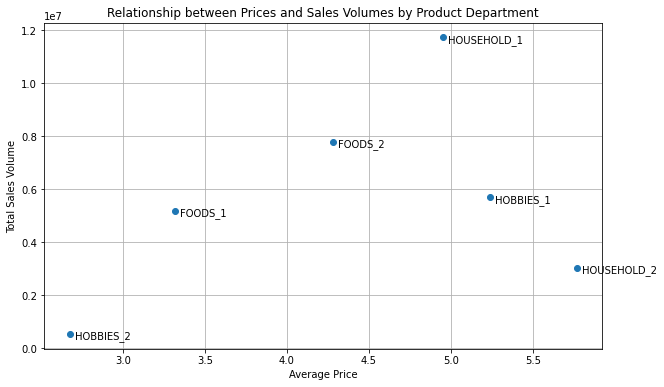

In [129]:
plt.figure(figsize=(10, 6))

# Plotting relationship between average prices and total sales volume for each category
plt.scatter(dept_prices, sales_by_dept['total_sales'])
plt.title('Relationship between Prices and Sales Volumes by Product Department')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

for i, txt in enumerate(dept_prices.index):
    plt.annotate(txt, (dept_prices[i], sales_by_dept['total_sales'][i]), xytext=(5, -5), textcoords='offset points')

plt.show()

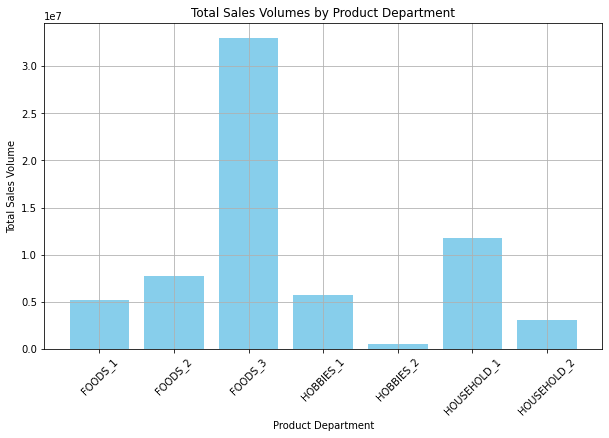

In [138]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(dept_prices.index, sales_by_dept['total_sales'], color='skyblue')
plt.title('Total Sales Volumes by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)



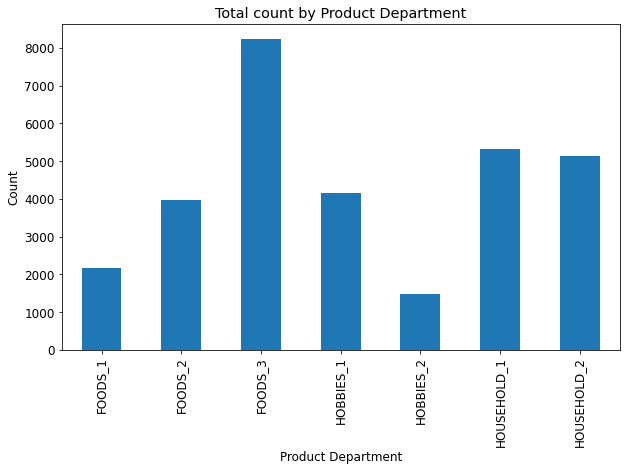

In [196]:
evaluation.groupby('dept_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Count')
plt.show()

In [185]:
dept_sales=evaluation.groupby('dept_id').sum().transpose()
dept_sales.index=training_dates
dept_sales

dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
date,,,,,,,
2011-01-29,2343,4094,16741,3610,154,4105,1584
2011-01-30,2216,4209,16333,3172,185,3858,1776
2011-01-31,1657,3174,12343,2497,185,2827,1100
2011-02-01,1508,3606,13764,2531,138,2732,1133
2011-02-02,1209,2869,10525,1714,100,1802,927
...,...,...,...,...,...,...,...
2016-05-18,3073,4648,17069,3291,449,6641,1925
2016-05-19,3251,4551,16935,3027,448,6759,1992
2016-05-20,3735,4815,19586,3761,382,7974,2299


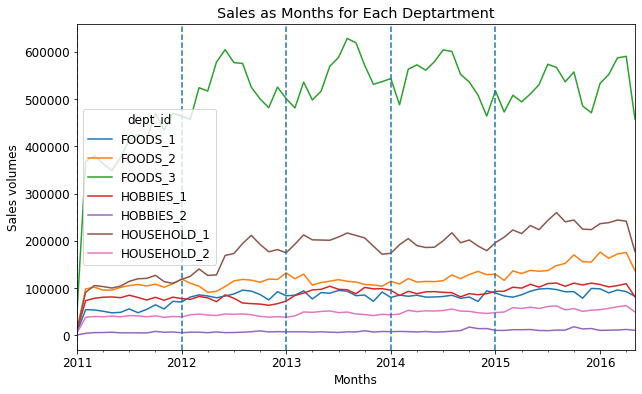

In [186]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Deptartment')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

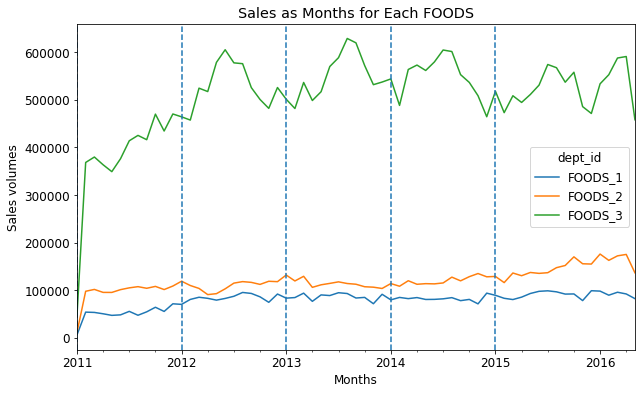

In [187]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales[['FOODS_1','FOODS_2','FOODS_3']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each FOODS')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

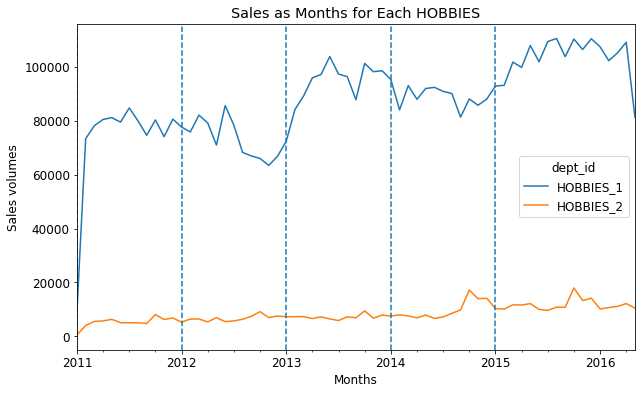

In [191]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales[['HOBBIES_1','HOBBIES_2']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each HOBBIES')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

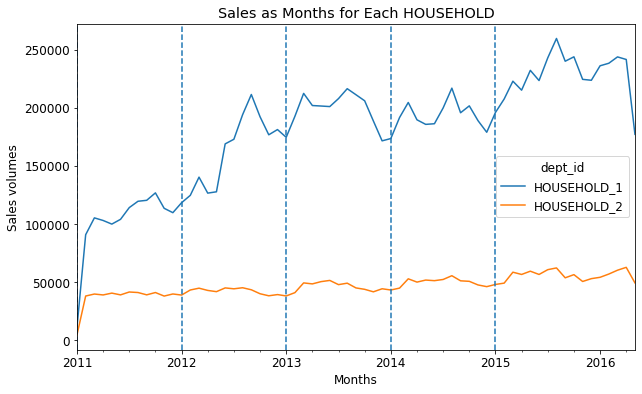

In [193]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
dept_sales[['HOUSEHOLD_1','HOUSEHOLD_2']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each HOUSEHOLD')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

In [131]:
state_prices = merged_data.groupby("state_id")["sell_price"].mean()
state_prices

state_id
CA    4.834519
TX         NaN
WI         NaN
Name: sell_price, dtype: float64

In [132]:
sales_by_state = merged_data.groupby('state_id').sum()[['d_' + str(i) for i in range(1, 1942)]]
sales_by_state

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
state_id,,,,,,,,,,,,,,,,,,,,,
CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,11822,...,18471,23037,24704,17721,16150,15678,16297,17430,23103,24644
TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,7319,...,12320,12366,16249,12228,11370,10375,9162,12303,13681,14815
WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,6431,...,13282,18905,18968,12413,11257,11043,11504,12819,14734,14879


In [133]:
sales_by_state['total_sales'] = sales_by_state.sum(axis=1)
sales_by_state['total_sales']

state_id
CA    29196717
TX    19228405
WI    18502051
Name: total_sales, dtype: int64

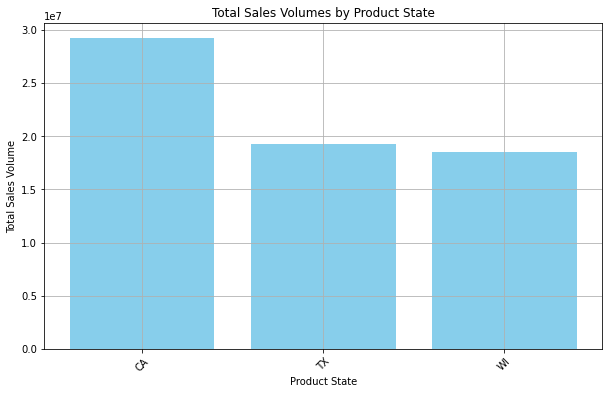

In [140]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(state_prices.index, sales_by_state['total_sales'], color='skyblue')
plt.title('Total Sales Volumes by Product State')
plt.xlabel('Product State')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)


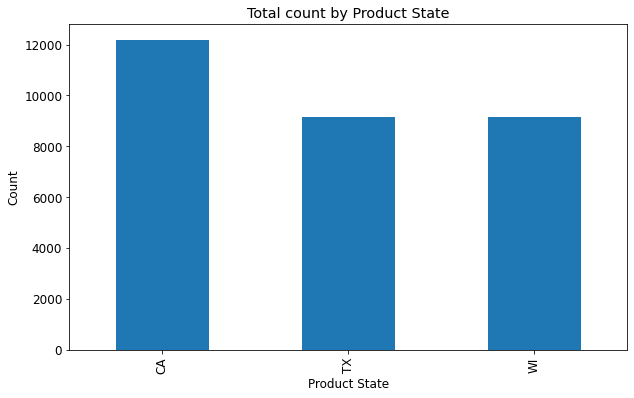

In [216]:
evaluation.groupby('state_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product State')
plt.xlabel('Product State')
plt.ylabel('Count')
plt.show()

In [151]:
state_sales=evaluation.groupby('state_id').sum().transpose()
state_sales.index=training_dates
state_sales

state_id,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-05-18,15678,10375,11043
2016-05-19,16297,9162,11504
2016-05-20,17430,12303,12819


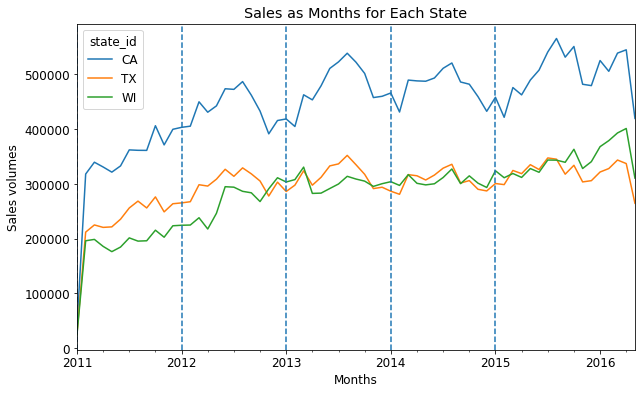

In [183]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
state_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each State')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

In [141]:
sales_by_store = merged_data.groupby('store_id').sum()[['d_' + str(i) for i in range(1, 1942)]]
sales_by_store

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,4951,6245,6707,4568,3949,3995,4136,4433,5764,6289
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4839,6507,6710,4238,3963,3789,4037,4751,7120,6614
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,6046,7029,7969,5891,5523,5375,5580,5542,7073,8144
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2635,3256,3318,3024,2715,2519,2544,2704,3146,3597
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3610,3787,5000,3708,3310,3147,2748,3664,4167,4624
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,4415,4424,5866,4179,4008,3518,3126,4249,4802,5217
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,4295,4155,5383,4341,4052,3710,3288,4390,4712,4974
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,3978,5527,5488,3505,3323,3242,3478,3813,5002,5054
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,5317,7704,7586,5011,4628,4533,4628,4880,5213,5068


In [142]:
sales_by_store['total_sales'] = sales_by_store.sum(axis=1)
sales_by_store['total_sales']

store_id
CA_1     7832248
CA_2     5818395
CA_3    11363540
CA_4     4182534
TX_1     5692823
TX_2     7329642
TX_3     6205940
WI_1     5261506
WI_2     6697988
WI_3     6542557
Name: total_sales, dtype: int64

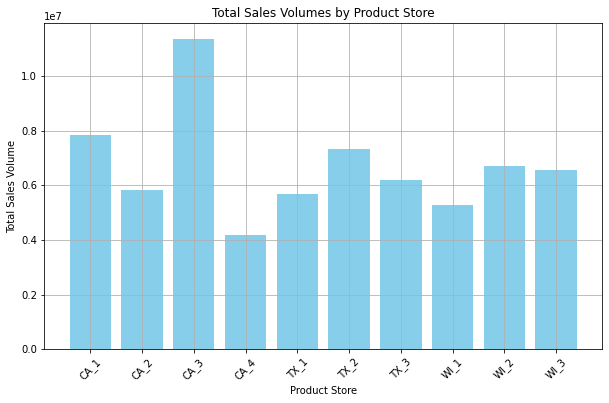

In [143]:
plt.figure(figsize=(10, 6))

# Plot a bar graph of average price and total sales for each category
plt.bar(store_prices.index, sales_by_store['total_sales'], color='skyblue')
plt.title('Total Sales Volumes by Product Store')
plt.xlabel('Product Store')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)  
plt.grid(True)

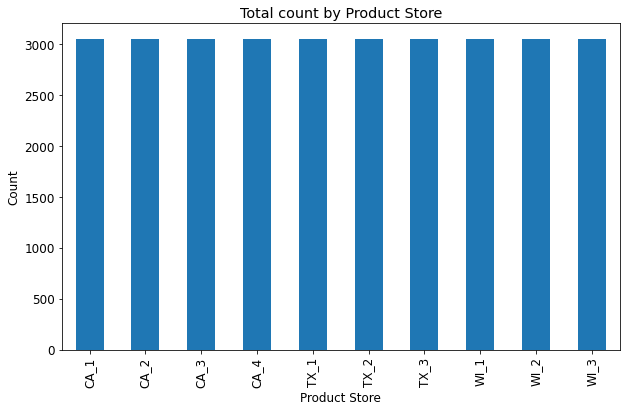

In [218]:
evaluation.groupby('store_id')['item_id'].count().plot(kind='bar', figsize=(10,6))
plt.title('Total count by Product Store')
plt.xlabel('Product Store')
plt.ylabel('Count')
plt.show()

In [168]:
store_sales=evaluation.groupby('store_id').sum().transpose()
store_sales.index=training_dates
store_sales

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,3995,3789,5375,2519,3147,3518,3710,3242,4533,3268
2016-05-19,4136,4037,5580,2544,2748,3126,3288,3478,4628,3398
2016-05-20,4433,4751,5542,2704,3664,4249,4390,3813,4880,4126


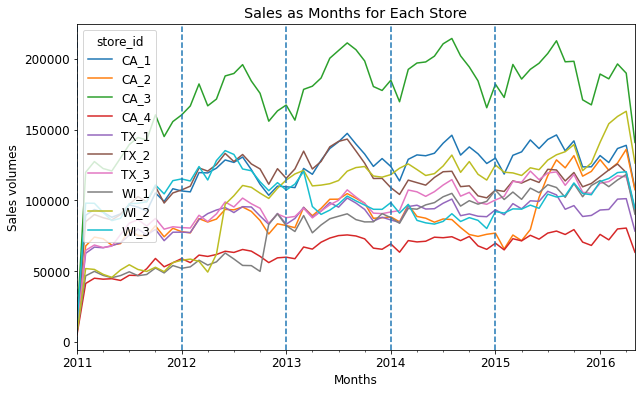

In [178]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales.resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

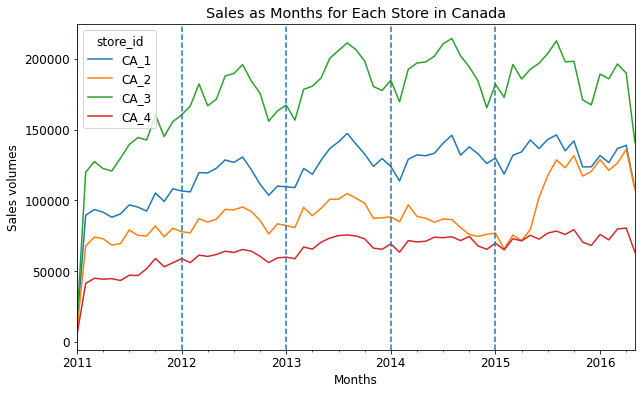

In [177]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales[['CA_1','CA_2','CA_3','CA_4']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store in Canada')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

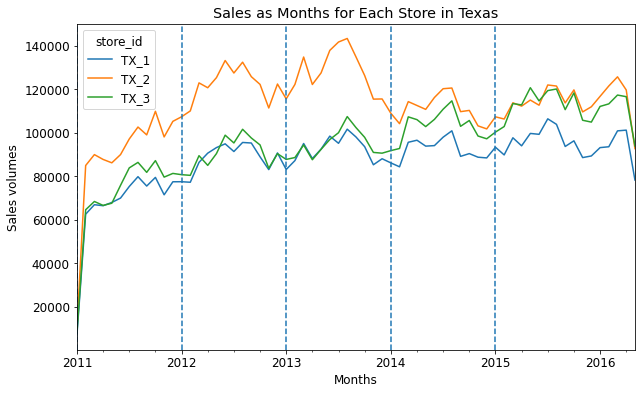

In [176]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales[['TX_1','TX_2','TX_3']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store in Texas')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

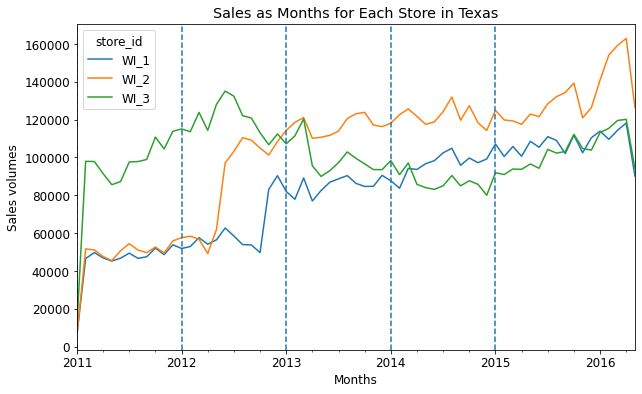

In [179]:
start_date = datetime.datetime(2011,1,19)
end_date = datetime.datetime(2016,6,19)

plt.rcParams.update({'font.size': 12})
store_sales[['WI_1','WI_2','WI_3']].resample('M').sum().plot(figsize=(10,6))

plt.title('Sales as Months for Each Store in Texas')
plt.xlabel('Months')
plt.ylabel('Sales volumes')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), linestyle='--')
plt.show()

<AxesSubplot:title={'center':'Events Type (%)'}, xlabel='Days with Events (%)'>

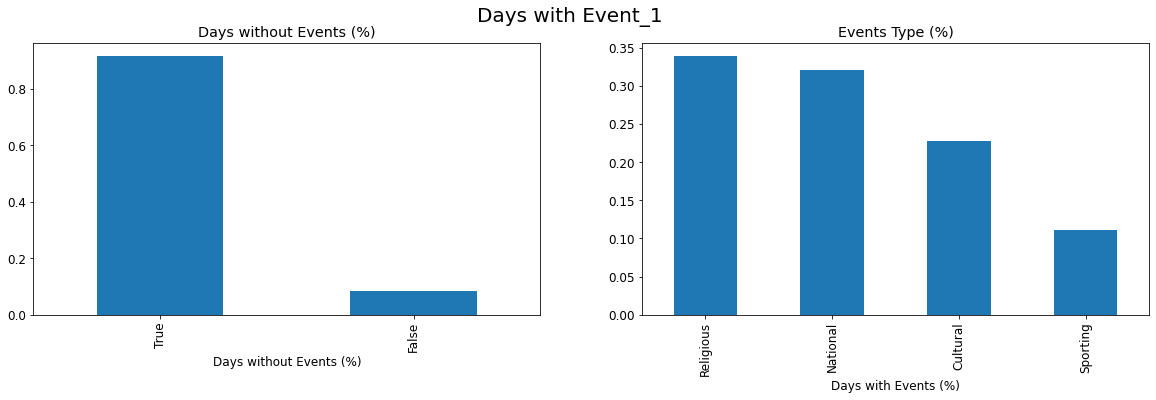

In [209]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("Days with Event_1 ", fontsize=20)

calendar["event_name_1"].isnull().value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days without Events (%)", ax=ax1, title="Days without Events (%)")

calendar["event_type_1"].value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days with Events (%)", ax=ax2, title="Events Type (%)")

<AxesSubplot:title={'center':'Events Names'}, xlabel='Event Name'>

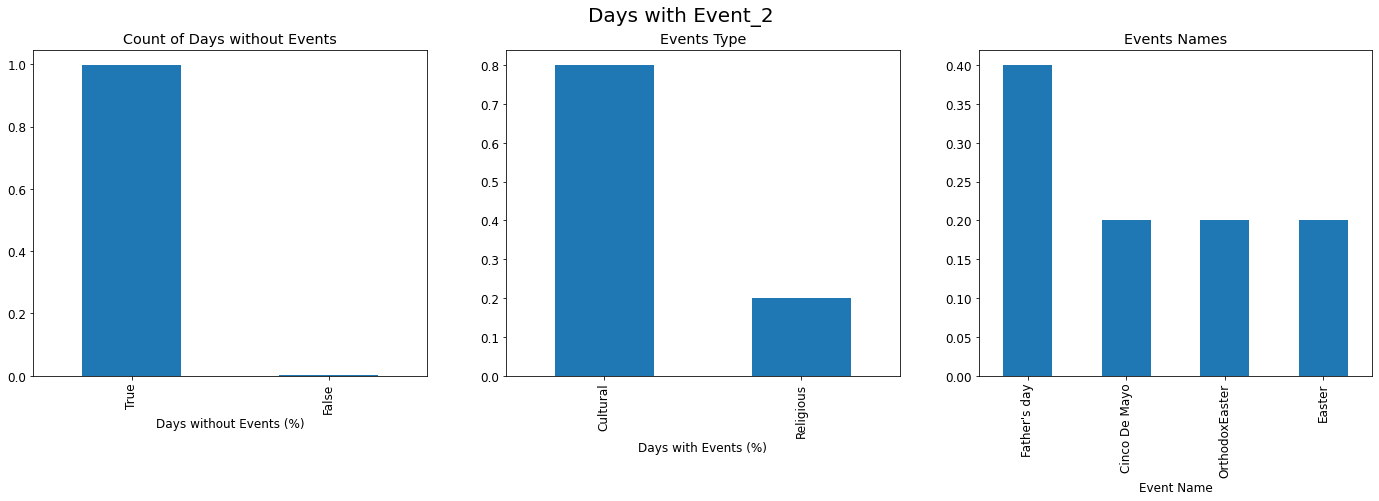

In [215]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
fig.suptitle("Days with Event_2", fontsize=20)

calendar["event_name_2"].isnull().value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days without Events (%)", ax=ax1, title="Count of Days without Events")

calendar["event_type_2"].value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Days with Events (%)", ax=ax2, title="Events Type")

calendar["event_name_2"].value_counts(normalize=True)\
                                                .plot(kind="bar", xlabel="Event Name", ax=ax3, title="Events Names")